# Heart Disease Classification

This notebook uses Machine learning technique to predict the heart disease using classification algorithms.

**What is classification?**

Classification is the way to decide whether the sample is of one class or another, known as `single-class classificatin`. If it classifies between multiple classes it's called `Multi-class Classification`.

#### Machine Learning Modeling Framework
1. Problem Defination
2. Data
3. Evaluation 
4. Feature
5. Modelling
6. Experiment


## 1. Problem Defination
Problem is to explore whether the patient has a heart disease or not, that's why `binary classification`. 

## 2. Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

Data has been taken form the kaggle's [Heart-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci)

Though, the original data came from the Cleveland database from UCI Machine Learning Repository.


## 3. Evaluation

The goal is to train model to provide more than or equal to 95% accuracy to the test dataset.


## 4. Feature

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  *  0: Typical angina: chest pain related decrease blood supply to the heart
  *  1: Atypical angina: chest pain not related to heart
  *  2: Non-anginal pain: typically esophageal spasms (non heart related)
  *  3: Asymptomatic: chest pain not showing signs of disease
4.  trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl
  *  serum = LDL + HDL + .2 * triglycerides
  *  above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  *  0: Nothing to note
  *  1: ST-T Wave abnormality
     can range from mild symptoms to severe problems
     signals non-normal heart beat
  *  2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  *  0: Upsloping: better heart rate with excercise (uncommon)
  *  1: Flatsloping: minimal change (typical healthy heart)
  *  2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
  *  1,3: normal
  *  6: fixed defect: used to be defect but ok now
  *  7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the data

In [2]:
# Importing the important modules used in ml modelling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Importing the data set
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

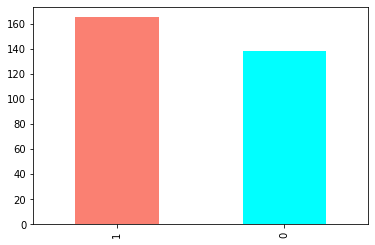

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "cyan"]);

### Checking if data has empty data or string data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


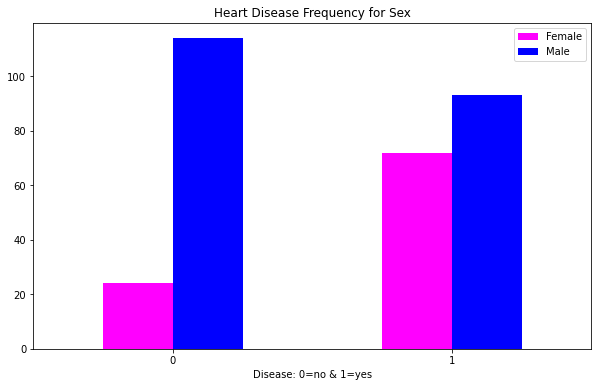

In [10]:
# Plot to demonstrate crosstab between sex and target

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["magenta", "blue"])
plt.xlabel("Disease: 0=no & 1=yes")
plt.xticks(rotation=0)
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female", "Male"]);

This graph infers that males are 50% chances and females are having 75% chances of having heart disease.(Both approx)

### Age vs Max heart rate for heart disease

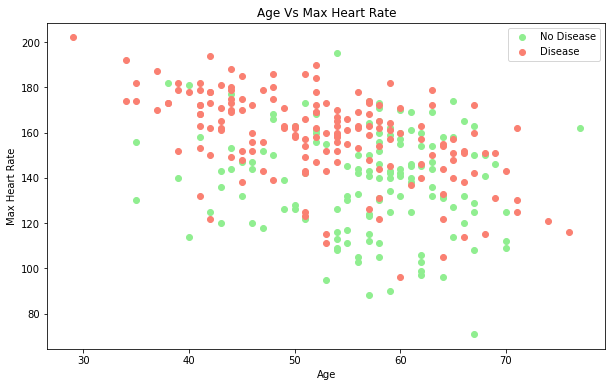

In [11]:
# Plot to demonstrate age vs max heart rate

plt.figure(figsize=(10,6));

plt.scatter(df.age[df.target ==0],
           df.thalach[df.target == 0],
           c="lightgreen")

plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

plt.legend(["No Disease", "Disease"])

plt.title("Age Vs Max Heart Rate")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

This suggests that more the age is less the max heart rate is.

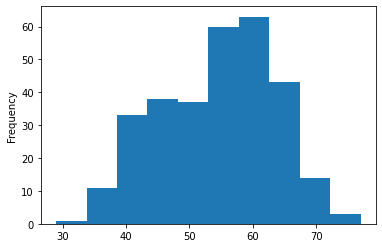

In [12]:
# Graph to check age distribution
df.age.plot.hist(bins=10);

## Heart Disease Frequency Vs Chest Pain Type

In [13]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16
